In [1]:
%reload_ext cpp2py.magic

# Manipulate the TRIQS Green function

In [2]:
%%cpp2py -C pytriqs             
#include <triqs/gfs.hpp>
using namespace triqs;
using namespace triqs::gfs;
        
gf<imfreq> demo(double beta) {

 int n_freq = 1000;

 clef::placeholder<0> iw_;

 // Construction of a 1x1 matrix-valued fermionic gf on Matsubara frequencies.
 auto g_iw = gf<imfreq>{{beta, Fermion, n_freq}, {1, 1}};

 // Automatic placeholder evaluation
 g_iw(iw_) << 1 / (iw_ + 2);
    

 // Writing the Green's functions into an HDF5 file.
 auto f = h5::file("gf.h5", 'w');
 h5_write(f, "g_iw", g_iw);

 return g_iw;
}

Let us try it ...

In [3]:
!rm gf.h5
g = demo(10.0)

rm: cannot remove 'gf.h5': No such file or directory


In [5]:
!h5ls -r gf.h5

/                        Group
/g_iw                    Group
/g_iw/data               Dataset {2000, 1, 1, 2}
/g_iw/indices            Group
/g_iw/indices/left       Dataset {1}
/g_iw/indices/right      Dataset {1}
/g_iw/mesh               Group
/g_iw/mesh/domain        Group
/g_iw/mesh/domain/beta   Dataset {SCALAR}
/g_iw/mesh/domain/statistic Dataset {SCALAR}
/g_iw/mesh/positive_freq_only Dataset {SCALAR}
/g_iw/mesh/size          Dataset {SCALAR}


(0, 20)

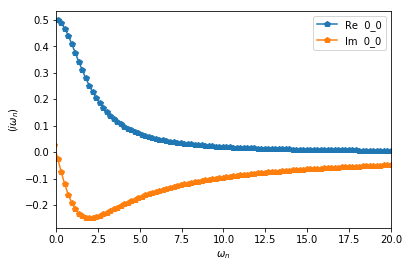

In [12]:
from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import oplot, oplotr
import matplotlib.pyplot as plt
%matplotlib inline
#with HDFArchive("gf.h5",'r') as A:  # Open file
#  oplot(A['g_iw'], '-o')
oplot(demo(30), '-p')
plt.xlim(0,20)

In [13]:
demo(30)

Green Function  with mesh Matsubara Freq Mesh of size 2000, Domain: Matsubara domain with beta = 30, statistic = Fermion, positive_only : 0 and target_rank 2: 